<a href="https://colab.research.google.com/github/noorasmat/Scaling-Normazlization-Descritization-Visualization/blob/master/Preproccessing_of_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing data

For [Help](https://scikit-learn.org/stable/modules/preprocessing.html) and 
 [Dataset downloaded from](https://www.mldata.io/datasets/)

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn import preprocessing 
import os                     # For os related operations
import sys                    # For data size


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
wh = pd.read_csv("/content/drive/My Drive/DataSets/Missing values/kamyr-digester.csv") #Read the dataset
wh.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,NaN,16.471,46.011,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,6.076,16.543,43.954,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,NaN,16.559,44.495,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,6.054,16.562,45.592,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,6.110,16.677,45.512,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


In [4]:
wh.describe()

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
count,301.000000,297.000000,287.000000,288.000000,300.000000,300.000000,300.000000,277.000000,300.000000,160.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,160.000000
mean,20.568605,14.338670,87.271564,1235.537278,259.365993,356.907033,324.010783,1.490588,593.148090,6.143013,17.892030,46.875530,66.834567,325.37041,300.381743,162.120610,875.491563,1170.387177,266.104633,49.664537,251.229687,30.463594
std,2.990751,1.490121,7.839690,102.023065,85.643939,8.954457,7.650502,0.108138,66.949732,0.082396,0.902461,1.428406,5.643655,4.63735,4.647201,14.129462,123.182165,149.288972,163.222997,4.589876,1.293151,0.671066
min,12.170000,9.983000,68.645000,0.000000,0.000000,339.168000,284.633000,1.182000,405.111000,5.890000,16.471000,42.822000,48.568000,318.05100,293.312000,113.922000,486.938000,838.948000,0.000000,35.510000,248.359000,29.010000
25%,18.450000,13.358000,81.753500,1194.047250,215.369250,350.317000,321.534000,1.429000,543.137750,6.093000,17.115000,45.818000,62.847250,321.23275,296.418250,153.089750,791.096750,1038.338500,141.560000,46.378500,250.298250,30.107500
50%,20.740000,14.417000,86.705000,1267.130000,271.845500,357.178500,325.638500,1.498000,594.294000,6.140000,17.797000,46.911000,67.751000,323.25150,298.493000,163.601000,869.552000,1144.513500,280.451500,50.192500,251.357500,30.395000
75%,23.000000,15.492000,92.153500,1288.390000,321.285000,362.326250,329.129250,1.561000,643.567000,6.200000,18.595250,48.004750,71.650250,329.81600,304.228250,172.286750,969.904000,1318.632750,405.887750,53.284750,252.332250,30.838250
max,27.600000,16.958000,121.717000,1351.240000,419.014000,399.135000,337.012000,1.747000,731.394000,6.340000,19.582000,50.658000,76.147000,333.85400,311.146000,189.268000,1226.277000,1395.767000,715.715000,63.332000,254.122000,32.840000


In [5]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Observation         object
Y-Kappa            float64
ChipRate           float64
BF-CMratio         float64
BlowFlow           float64
ChipLevel4         float64
T-upperExt-2       float64
T-lowerExt-2       float64
UCZAA              float64
WhiteFlow-4        float64
AAWhiteSt-4        float64
AA-Wood-4          float64
ChipMoisture-4     float64
SteamFlow-4        float64
Lower-HeatT-3      float64
Upper-HeatT-3      float64
ChipMass-4         float64
WeakLiquorF        float64
BlackFlow-2        float64
WeakWashF          float64
SteamHeatF-3       float64
T-Top-Chips-4      float64
SulphidityL-4      float64
dtype: object

### Visualizing the variables

Text(0, 0.5, 'Flights')

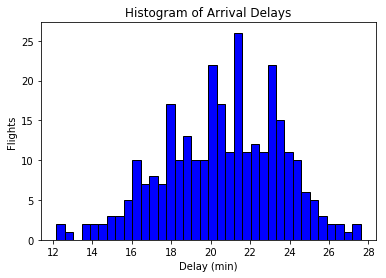

In [6]:
# matplotlib histogram
plt.hist(wh['Y-Kappa'], color = 'blue', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

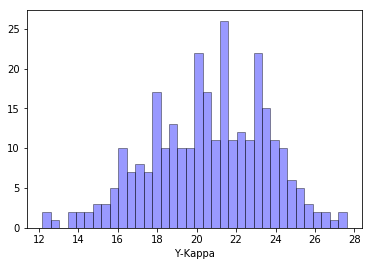

In [7]:
# seaborn histogram
sns.distplot(wh['Y-Kappa'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

In [8]:
#Dropping not int column
wh=wh.drop(['Observation'], axis=1)
wh.head()


,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,NaN,16.471,46.011,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,6.076,16.543,43.954,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,NaN,16.559,44.495,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,6.054,16.562,45.592,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,6.110,16.677,45.512,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


In [0]:
# Create x, where x the 'scores' column's values as floats
x = wh[['Y-Kappa']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

### Scaling Through custom code

In [0]:
whn1=((wh-wh.min())/(wh.max()-wh.min()))*1

In [11]:
whn1.head()

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,0.708360,0.937204,1.000000,0.871501,0.405249,0.318742,0.857443,0.461947,0.595011,NaN,0.000000,0.406968,0.672758,0.720180,0.548783,0.823428,0.865988,0.862203,0.359536,0.686579,0.645150,NaN
1,1.000000,0.978781,0.195527,0.983067,0.814596,0.198142,0.848317,0.649558,0.404833,0.413333,0.023144,0.144461,0.414953,0.808201,0.648593,0.654049,0.242158,0.823192,0.336981,0.398713,0.528718,0.026110
2,0.714193,0.964301,0.205702,0.983842,0.570771,0.181000,0.852002,0.739823,0.442867,NaN,0.028287,0.213502,0.461801,0.701702,0.564708,0.664813,0.257792,0.876630,0.331517,0.585328,0.516398,NaN
3,0.740765,0.931183,0.233004,0.987890,0.509594,0.196275,0.887932,0.746903,0.668901,0.364444,0.029251,0.353497,0.722579,0.684933,0.501402,0.896730,0.379954,0.871940,0.334600,0.694990,0.338886,0.002611
4,0.695399,0.807885,0.463502,0.987366,0.580246,0.207981,0.917849,NaN,0.715823,0.488889,0.066217,0.343287,0.777911,0.651838,0.428507,0.929140,0.543066,0.905996,0.300919,0.671267,0.270172,0.000000


Text(0, 0.5, 'Flights')

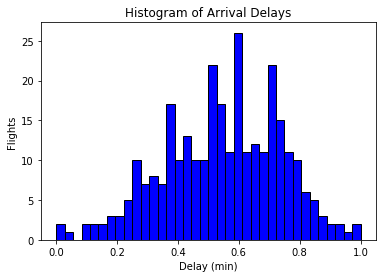

In [12]:
# matplotlib histogram
plt.hist(whn1['Y-Kappa'], color = 'blue', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

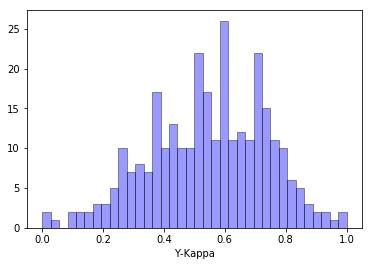

In [13]:
# seaborn histogram
sns.distplot(whn1['Y-Kappa'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

### Scaling through mlextend package

In [0]:
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# mix-max scale the data between 0 and 1
whn2 = minmax_scaling(wh, columns = ['Y-Kappa'])

Text(0, 0.5, 'Flights')

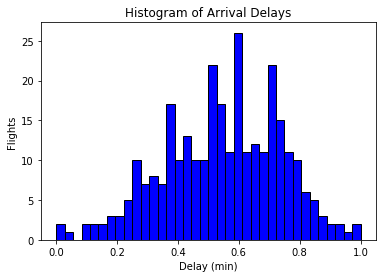

In [15]:
# matplotlib histogram
plt.hist(whn2['Y-Kappa'], color = 'blue', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

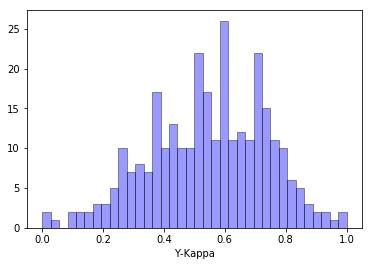

In [16]:
# seaborn histogram
sns.distplot(whn2['Y-Kappa'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

### Z_Score normalization

In [0]:
normalized_df=(wh-wh.mean())/wh.std()

Text(0, 0.5, 'Flights')

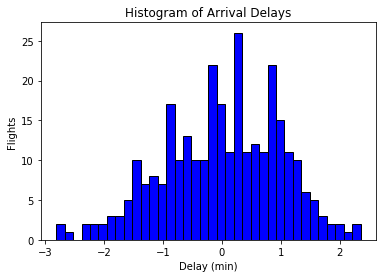

In [18]:
# matplotlib histogram
plt.hist(normalized_df['Y-Kappa'], color = 'blue', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

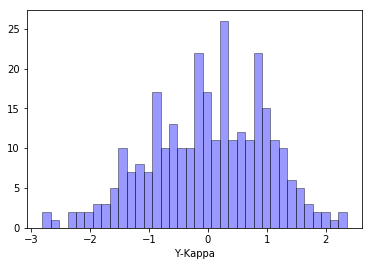

In [19]:
# seaborn histogram
sns.distplot(normalized_df['Y-Kappa'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

# Descretization

### Numeric Descrtization

In [51]:
bins = [0, 1, 5, 10, 25, 50, 100]
wh['binned1'] = np.searchsorted(bins, wh['Y-Kappa'].values)
print (wh['binned1'])

0      4
1      5
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     5
12     5
13     4
14     5
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     4
28     4
29     4
      ..
271    4
272    4
273    4
274    4
275    4
276    4
277    4
278    4
279    4
280    4
281    4
282    4
283    4
284    4
285    4
286    4
287    4
288    4
289    4
290    4
291    4
292    4
293    4
294    4
295    4
296    4
297    4
298    4
299    4
300    4
Name: binned1, Length: 301, dtype: int64


Text(0, 0.5, 'Flights')

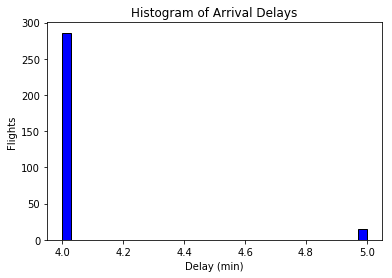

In [52]:
# matplotlib histogram
plt.hist(wh['binned1'], color = 'blue', edgecolor = 'black', bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

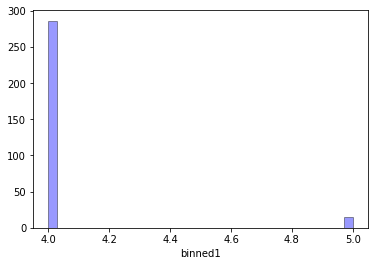

In [53]:
# seaborn histogram
sns.distplot(wh['binned1'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

### Categorical Descritization

In [39]:
bins = [0, 1, 5, 10, 25, 50, 100]
wh['binned'] = pd.cut(wh['Y-Kappa'], bins)
wh['binned'] 

0      (10, 25]
1      (25, 50]
2      (10, 25]
3      (10, 25]
4      (10, 25]
5      (10, 25]
6      (10, 25]
7      (10, 25]
8      (10, 25]
9      (10, 25]
10     (10, 25]
11     (25, 50]
12     (25, 50]
13     (10, 25]
14     (25, 50]
15     (10, 25]
16     (10, 25]
17     (10, 25]
18     (10, 25]
19     (10, 25]
20     (10, 25]
21     (10, 25]
22     (10, 25]
23     (10, 25]
24     (10, 25]
25     (10, 25]
26     (10, 25]
27     (10, 25]
28     (10, 25]
29     (10, 25]
         ...   
271    (10, 25]
272    (10, 25]
273    (10, 25]
274    (10, 25]
275    (10, 25]
276    (10, 25]
277    (10, 25]
278    (10, 25]
279    (10, 25]
280    (10, 25]
281    (10, 25]
282    (10, 25]
283    (10, 25]
284    (10, 25]
285    (10, 25]
286    (10, 25]
287    (10, 25]
288    (10, 25]
289    (10, 25]
290    (10, 25]
291    (10, 25]
292    (10, 25]
293    (10, 25]
294    (10, 25]
295    (10, 25]
296    (10, 25]
297    (10, 25]
298    (10, 25]
299    (10, 25]
300    (10, 25]
Name: binned, Length: 30

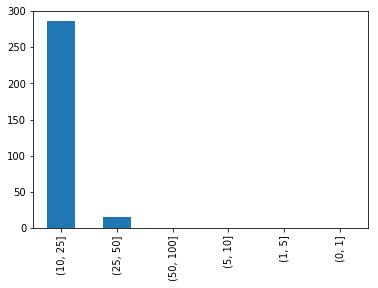

In [40]:
wh['binned'].value_counts().plot(kind='bar')

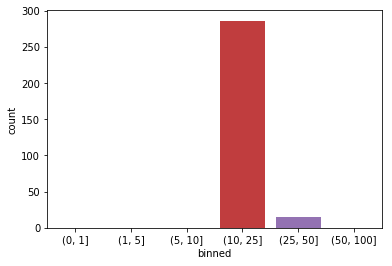

In [44]:
sns.countplot(wh['binned'])

In [47]:
wh['binned2']=pd.cut(wh['Y-Kappa'], 8) 
wh['binned2']

0      (21.814, 23.742]
1        (25.671, 27.6]
2      (21.814, 23.742]
3      (21.814, 23.742]
4      (21.814, 23.742]
5      (19.885, 21.814]
6      (21.814, 23.742]
7      (21.814, 23.742]
8      (23.742, 25.671]
9      (21.814, 23.742]
10     (23.742, 25.671]
11       (25.671, 27.6]
12       (25.671, 27.6]
13     (23.742, 25.671]
14     (23.742, 25.671]
15     (23.742, 25.671]
16     (16.028, 17.956]
17     (16.028, 17.956]
18     (19.885, 21.814]
19     (19.885, 21.814]
20     (19.885, 21.814]
21     (21.814, 23.742]
22     (21.814, 23.742]
23     (19.885, 21.814]
24     (19.885, 21.814]
25     (17.956, 19.885]
26     (19.885, 21.814]
27     (19.885, 21.814]
28     (19.885, 21.814]
29     (23.742, 25.671]
             ...       
271    (21.814, 23.742]
272    (21.814, 23.742]
273    (21.814, 23.742]
274    (21.814, 23.742]
275    (21.814, 23.742]
276    (19.885, 21.814]
277    (19.885, 21.814]
278    (19.885, 21.814]
279    (21.814, 23.742]
280    (23.742, 25.671]
281    (19.885, 

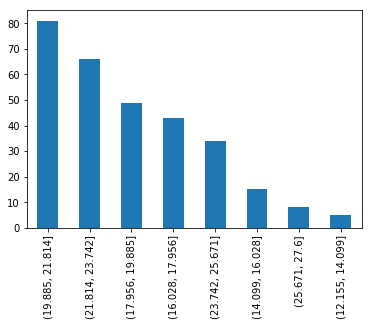

In [48]:
wh['binned2'].value_counts().plot(kind='bar')

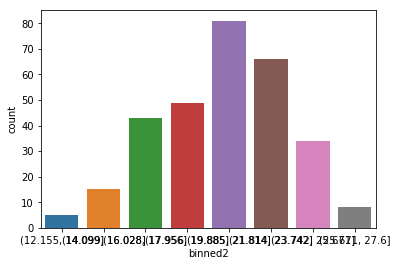

In [50]:
sns.countplot(wh['binned2'])